            id_asset   timestamp     open     high      low    close   
timestamp                                                              
2017-08-17         1  2017-08-17  4261.48  4485.39  4200.74  4285.08  \

                volume               close_time  quote_asset_volume   
timestamp                                                             
2017-08-17  795.150377  2017-08-17 23:59:59.999        3.454770e+06  \

            number_of_trades  taker_buy_base_asset_volume   
timestamp                                                   
2017-08-17              3427                   616.248541  \

            taker_buy_quote_asset_volume  ignore  
timestamp                                         
2017-08-17                  2.678216e+06     0.0  


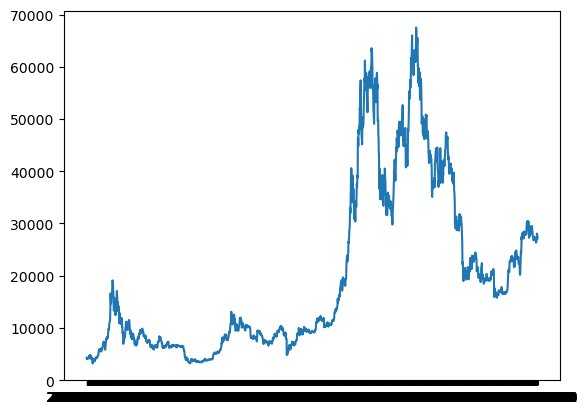

1902 212


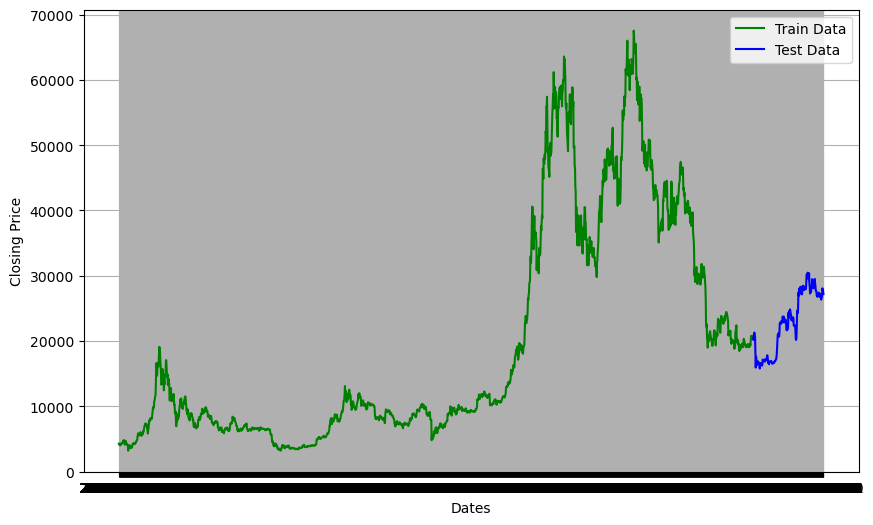

1 ,yhat = 20509.733832058926 , actual value = 20483.62
2 ,yhat = 20485.926227077507 , actual value = 20151.84
3 ,yhat = 20154.551858186187 , actual value = 20207.82
4 ,yhat = 20201.01078604784 , actual value = 21148.52
5 ,yhat = 21107.22330403161 , actual value = 21299.37
6 ,yhat = 21286.47890854931 , actual value = 20905.58
7 ,yhat = 20944.209966679744 , actual value = 20591.13
8 ,yhat = 20634.229248126558 , actual value = 18547.23
9 ,yhat = 18612.525269344707 , actual value = 15922.81
10 ,yhat = 15982.652884103405 , actual value = 17601.15
11 ,yhat = 17484.770787413974 , actual value = 17070.31
12 ,yhat = 16965.383449763467 , actual value = 16812.08
13 ,yhat = 16785.375826218944 , actual value = 16329.85
14 ,yhat = 16383.396812372188 , actual value = 16619.46
15 ,yhat = 16586.82680423833 , actual value = 16900.57
16 ,yhat = 16871.583243358167 , actual value = 16662.76
17 ,yhat = 16663.67713635833 , actual value = 16692.56
18 ,yhat = 16706.985073329495 , actual value = 16700.45
19 ,yh

149 ,yhat = 27267.821305977057 , actual value = 28348.6
150 ,yhat = 28307.786171456413 , actual value = 28028.53
151 ,yhat = 28018.654593338106 , actual value = 28465.36
152 ,yhat = 28483.1255681066 , actual value = 28452.73
153 ,yhat = 28479.05533031391 , actual value = 28171.87
154 ,yhat = 28182.566856679317 , actual value = 27800.0
155 ,yhat = 27824.308524859982 , actual value = 28165.47
156 ,yhat = 28145.178598589435 , actual value = 28170.01
157 ,yhat = 28152.392669455556 , actual value = 28033.82
158 ,yhat = 28036.377151907047 , actual value = 27906.33
159 ,yhat = 27921.440619607016 , actual value = 27938.38
160 ,yhat = 27933.662987159347 , actual value = 28323.76
161 ,yhat = 28303.935704067302 , actual value = 29637.34
162 ,yhat = 29593.170653750964 , actual value = 30200.42
163 ,yhat = 30196.65936909656 , actual value = 29888.07
164 ,yhat = 29944.85180683484 , actual value = 30373.84
165 ,yhat = 30412.608168244587 , actual value = 30466.93
166 ,yhat = 30474.089781636383 , actua

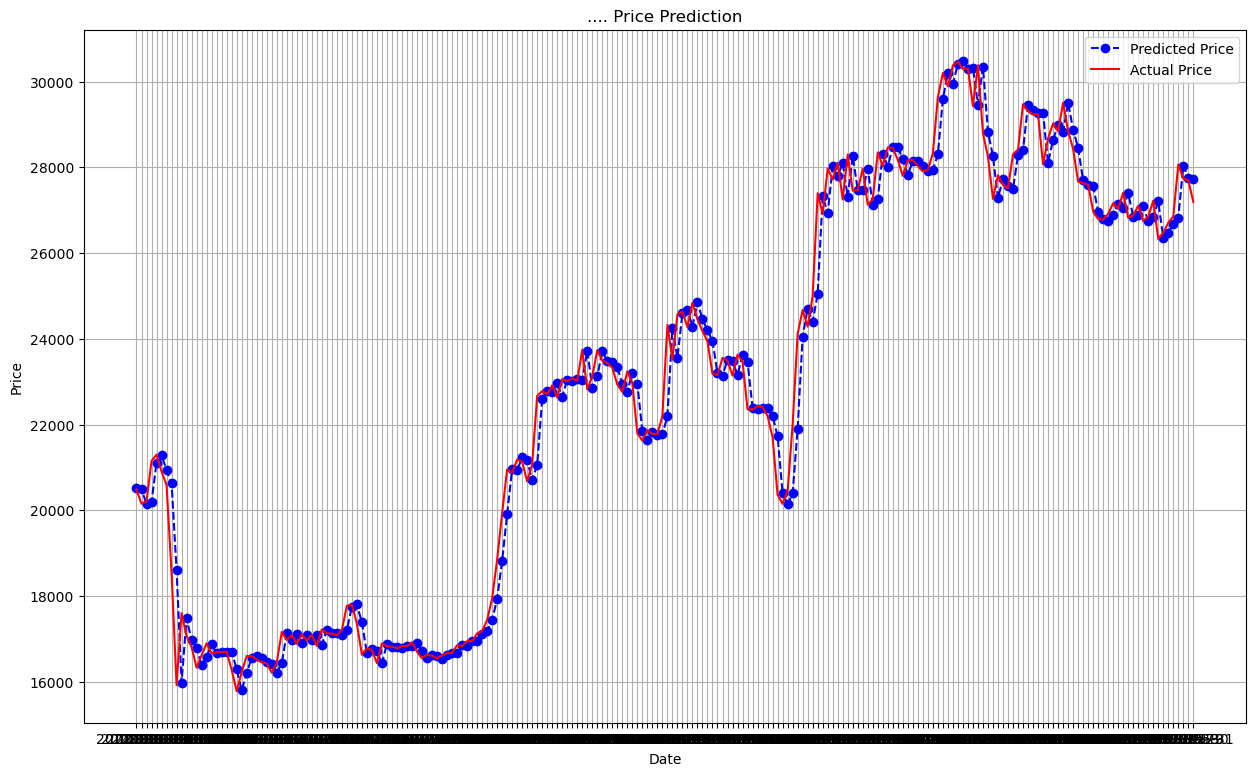

MAPE : 0.017834806212852033


In [2]:
# Recap 
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math, config

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

# Read Daily Data and select Asset 1 
path = config.path_ARIMA

df01 = pd.read_csv(f'{path}/All_2017_01_01_to_2023_05_31_daily.csv')
df = df01.loc[df01.id_asset == 1]
df.index = df['timestamp']
print(df.head(1))

# Plot 01- Close Price
plt.plot(df.index, df['close'])
plt.show()


# Train test split
to_row = int(len(df)*0.9) #==> get 90% data for train , 10% data for test

train_df = df[0:to_row]['close']
test_df = df[to_row:]['close']

train_data = list(train_df)
test_data = list(test_df)
print(len(train_data), len(test_data))
train_data[:5]


# Plot 02 - splited data into a train and training set
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Price')
plt.plot(train_df, 'green', label= 'Train Data')
plt.plot(test_df, 'blue', label= 'Test Data')
plt.legend()
plt.show()

# Model Predictin with ARIMA (Take to much time !!!)
model_predictions = []
n_test_obser = len(test_data)
n = 0

for i in range(n_test_obser):
    model = ARIMA(train_data, order = (4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    actual_test_value = test_data[i]
    train_data.append(actual_test_value)
    n+=1
    
    print(f'{n} ,yhat = {yhat} , actual value = {actual_test_value}')
    #break
    
# Print Model Summary
print(model_fit.summary())

# Plot 03 - Predicted and Actual Price
plt.figure(figsize=(15,9))
plt.grid(True)

data_range = df[to_row:].index

plt.plot(data_range, model_predictions, 'blue', marker ='o', linestyle = 'dashed', label = 'Predicted Price')
plt.plot(data_range, test_data, 'red', label = 'Actual Price' )

plt.title('.... Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# report performance 
difference = np.abs(np.array(model_predictions) - np.array(test_data))
test_pred = np.abs(test_data)

mape = np.mean(difference / test_pred ) # Mean absolute percentage error

print(f'MAPE : {mape}') 
# Around 1.78% MAPE ==> The model is 98.22% accurate in predicting the test set observation.

In [3]:
df.head()

,id_asset,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
timestamp,,,,,,,,,,,,,
2017-08-17,1,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,2017-08-17 23:59:59.999,3.454770e+06,3427,616.248541,2.678216e+06,0.0
2017-08-18,1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,2017-08-18 23:59:59.999,5.086958e+06,5233,972.868710,4.129123e+06,0.0
2017-08-19,1,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,2017-08-19 23:59:59.999,1.549484e+06,2153,274.336042,1.118002e+06,0.0
2017-08-20,1,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,2017-08-20 23:59:59.999,1.930364e+06,2321,376.795947,1.557401e+06,0.0
2017-08-21,1,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,2017-08-21 23:59:59.999,2.797232e+06,3972,557.356107,2.255663e+06,0.0


In [6]:
df['close'].head()

timestamp
2017-08-17    4285.08
2017-08-18    4108.37
2017-08-19    4139.98
2017-08-20    4086.29
2017-08-21    4016.00
Name: close, dtype: float64

In [ ]:
# Train test split
train_data = list(df['close'])
n=0 

for i in range(30):
    model = ARIMA(list(train_data), order = (4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    n+=1
    
    print(f'{n} ,yhat = {yhat}')

2071 43
1 ,yhat = 30342.61916828854 , actual value = 28797.1
2 ,yhat = 28829.236598414074 , actual value = 28243.65
3 ,yhat = 28255.754828148296 , actual value = 27262.84
4 ,yhat = 27280.7269908064 , actual value = 27816.85
5 ,yhat = 27732.315339559176 , actual value = 27590.6
6 ,yhat = 27557.393862004774 , actual value = 27510.93
7 ,yhat = 27496.23472238364 , actual value = 28300.79
8 ,yhat = 28286.235405305164 , actual value = 28415.29
9 ,yhat = 28405.069744653298 , actual value = 29472.77
10 ,yhat = 29456.930449013456 , actual value = 29311.7
11 ,yhat = 29348.02264918769 , actual value = 29230.45
12 ,yhat = 29263.162941245515 , actual value = 29233.21
13 ,yhat = 29261.239711983988 , actual value = 28068.26
14 ,yhat = 28098.97609911332 , actual value = 28669.86
15 ,yhat = 28643.640866209764 , actual value = 29026.16
16 ,yhat = 28986.754864027076 , actual value = 28838.16
17 ,yhat = 28825.931690037844 , actual value = 29505.61
18 ,yhat = 29510.30475934901 , actual value = 28848.2
19 ,

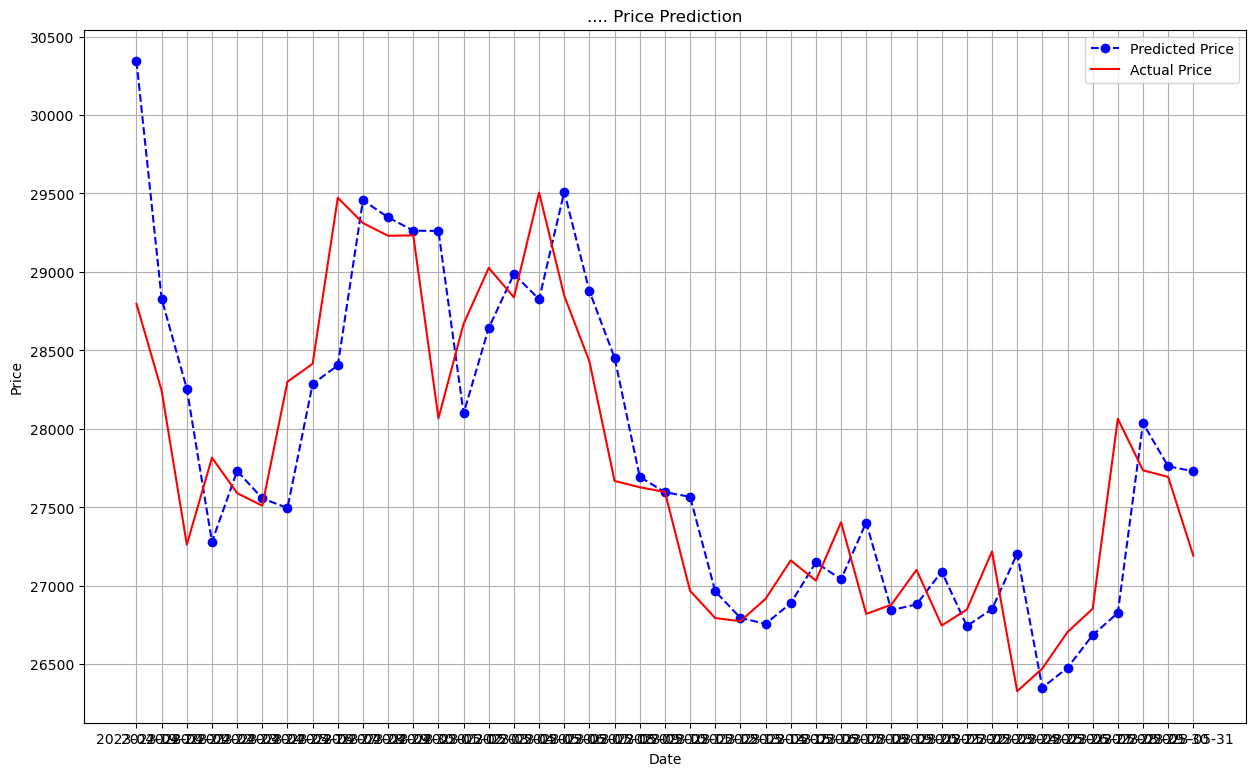

MAPE : 0.014963722868942748


In [33]:
# Train test split
to_row = int(len(df)*0.98) #==> get 90% data for train , 10% data for test

train_df = df[0:to_row]['close']
test_df = df[to_row:]['close']

train_data = list(train_df)
test_data = list(test_df)
print(len(train_data), len(test_data))
train_data[:5]

'''
# Plot 02 - splited data into a train and training set
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Price')
plt.plot(train_df, 'green', label= 'Train Data')
plt.plot(test_df, 'blue', label= 'Test Data')
plt.legend()
plt.show()
'''
# Model Predictin with ARIMA (Take to much time !!!)
model_predictions = []
n_test_obser = len(test_data)
n = 0

for i in range(n_test_obser):
    model = ARIMA(train_data, order = (4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    actual_test_value = test_data[i]
    train_data.append(actual_test_value)
    n+=1
    
    print(f'{n} ,yhat = {yhat} , actual value = {actual_test_value}')
    #break
    
# Plot 03 - Predicted and Actual Price
plt.figure(figsize=(15,9))
plt.grid(True)

data_range = df[to_row:].index

plt.plot(data_range, model_predictions, 'blue', marker ='o', linestyle = 'dashed', label = 'Predicted Price')
plt.plot(data_range, test_data, 'red', label = 'Actual Price' )

plt.title('.... Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# report performance 
difference = np.abs(np.array(model_predictions) - np.array(test_data))
test_pred = np.abs(test_data)

mape = np.mean(difference / test_pred ) # Mean absolute percentage error

print(f'MAPE : {mape}') 

In [34]:
# report performance 
difference = np.abs(np.array(model_predictions) - np.array(test_data))
test_pred = np.abs(test_data)

mape = np.mean(difference / test_pred ) # Mean absolute percentage error

print(f'MAPE : {mape}') 

MAPE : 0.014963722868942748


In [35]:
difference

array([1545.51916829,  585.58659841,  992.91482815,  536.12300919,
        141.71533956,   46.463862  ,  804.55527762,  129.05459469,
       1067.70025535,  145.23044901,  117.57264919,   29.95294125,
       1192.97971198,  570.88390089,  382.51913379,  148.59486403,
        679.67830996,  662.10475935,  447.68954166,  784.50451238,
         66.58252786,    2.03431836,  599.09381774,  170.39847739,
         21.08127899,  159.53099714,  272.37907971,  115.25334517,
        363.6246818 ,  582.32006368,   34.65564923,  220.48102623,
        343.52483131,  104.8014498 ,  367.46102338,  876.2306932 ,
        122.0411224 ,  227.43062314,  167.87932193, 1237.16869434,
        299.82565187,   67.74317085,  537.81713359])

In [37]:
mean_squared_error(test_data, model_predictions)

315543.9178686065

In [29]:
mean_absolute_error(test_data, model_predictions)

537.8171335898005

In [30]:
model_predictions

[27730.4871335898]

In [31]:
test_data

[27192.67]

In [39]:
np.mean(difference)

417.9233182756119

In [40]:
r2_score(test_data, model_predictions)

0.6122813216515326